# Part 2: Clinical Application

The data comes from the [Cardiac Arrythmia Suppression Trial (CAST)](https://physionet.org/content/crisdb/1.0.0/), which was sponsored by the National Heart, Lung, and Blood Institute (NHLBI). CAST collected 24 hours of heart rate data from ECGs from people who have had a myocardial infarction (MI) within the past two years.<sup>1</sup> This data has been smoothed and resampled to more closely resemble PPG-derived pulse rate data from a wrist wearable.<sup>2</sup>

1. **CAST RR Interval Sub-Study Database Citation** - Stein PK, Domitrovich PP, Kleiger RE, Schechtman KB, Rottman JN. Clinical and demographic determinants of heart rate variability in patients post myocardial infarction: insights from the Cardiac Arrhythmia Suppression Trial (CAST). Clin Cardiol 23(3):187-94; 2000 (Mar)
2. **Physionet Citation** - Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals (2003). Circulation. 101(23):e215-e220.

In [1]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the dataset

The dataset is stored as [.npz](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html) files. Each file contains roughly 24 hours of heart rate data in the 'hr' array sampled at 1Hz. The subject ID is the name of the file. These files are used to compute resting heart rate.

In [2]:
hr_filenames = glob.glob('datasets/crisdb/*.npz')
hr_filenames

['datasets/crisdb/m293b.npz',
 'datasets/crisdb/e093a.npz',
 'datasets/crisdb/m159a.npz',
 'datasets/crisdb/f125b.npz',
 'datasets/crisdb/e139a.npz',
 'datasets/crisdb/f060b.npz',
 'datasets/crisdb/m155b.npz',
 'datasets/crisdb/f083a.npz',
 'datasets/crisdb/f129a.npz',
 'datasets/crisdb/e135b.npz',
 'datasets/crisdb/m010b.npz',
 'datasets/crisdb/e070b.npz',
 'datasets/crisdb/e210a.npz',
 'datasets/crisdb/m270a.npz',
 'datasets/crisdb/f172b.npz',
 'datasets/crisdb/f037b.npz',
 'datasets/crisdb/e181a.npz',
 'datasets/crisdb/e162b.npz',
 'datasets/crisdb/m102b.npz',
 'datasets/crisdb/m227a.npz',
 'datasets/crisdb/e247a.npz',
 'datasets/crisdb/e027b.npz',
 'datasets/crisdb/m047b.npz',
 'datasets/crisdb/f191a.npz',
 'datasets/crisdb/m118a.npz',
 'datasets/crisdb/f164b.npz',
 'datasets/crisdb/e197a.npz',
 'datasets/crisdb/f021b.npz',
 'datasets/crisdb/m114b.npz',
 'datasets/crisdb/f168a.npz',
 'datasets/crisdb/f187a.npz',
 'datasets/crisdb/m051b.npz',
 'datasets/crisdb/e031b.npz',
 'datasets

### Load Metadata
Demographics metadata is stored in a file called 'metadata.csv'. This CSV has three columns, one for subject ID, age group, and sex. This file is used to make the association between resting heart rate and age group for each gender.

In [3]:
metadata_filename = 'datasets/crisdb/metadata.csv'
metadata = pd.read_csv(metadata_filename)
metadata.head()

,subject,age,sex
0,e198a,20-24,Male
1,e198b,20-24,Male
2,e028b,30-34,Male
3,e028a,30-34,Male
4,e061b,30-34,Male


### Compute Resting Heart Rate

In [4]:
def AgeAndRHR(metadata, filename):

    # Load the heart rate timeseries
    hr_data = np.load(filename)['hr']
    
    # Compute the resting heart rate from the timeseries by finding the lowest 5th percentile value in hr_data
    rhr = np.percentile(hr_data, 5)

    # Find the subject ID from the filename.
    subject = filename.split('.')[0][-5:]

    # Find the age group for this subject in metadata.
    age_group = metadata.age[metadata.subject==subject].values[0]
    
    # Find the sex for this subject in metadata.
    sex =  metadata.sex[metadata.subject==subject].values[0]

    return age_group, sex, rhr

df = pd.DataFrame(data=[AgeAndRHR(metadata, filename) for filename in hr_filenames],
                  columns=['age_group', 'sex', 'rhr'])

### Plot Resting Heart Rate vs. Age Group

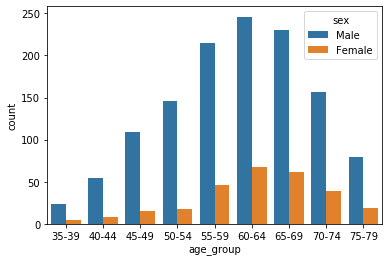

In [10]:
sns.countplot(x="age_group", 
              hue="sex", 
              data=df, 
              order=['35-39', '40-44','45-49','50-54','55-59', '60-64', '65-69', '70-74', '75-79'])

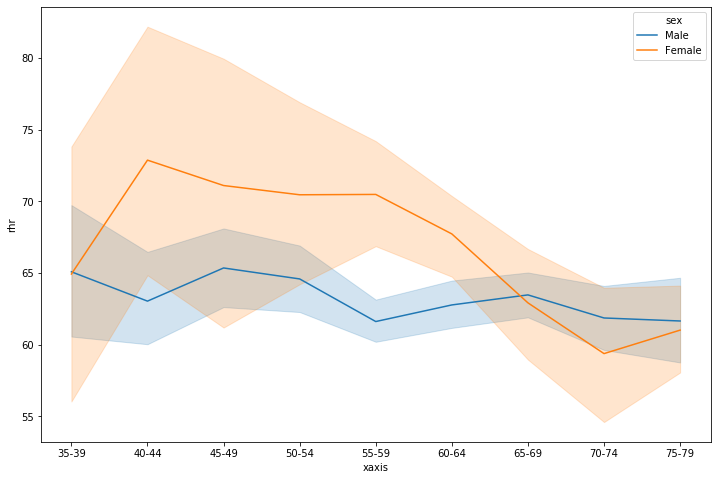

In [5]:
labels = sorted(np.unique(df.age_group))
df['xaxis'] = df.age_group.map(lambda x: labels.index(x)).astype('float')
plt.figure(figsize=(12, 8))
sns.lineplot(x='xaxis', y='rhr', hue='sex', data=df)
_ = plt.xticks(np.arange(len(labels)), labels)

### Clinical Conclusion

1. For women, there was an increase between the age group 35-29 and 40-44, and decrease after that. 
2. For men, there were flutuations. 
3. In comparison to men, women's heart rate is higher. 
4. What are some possible reasons for what we see in our data? The sample size is relatively small, expecially for females. 
5. What else can we do or go and find to figure out what is really happening? How would that improve the results? It is not clear whether the sample population has cardiac conditions or other conditions that impact the heart rate. To improve the results, we need to include the clinical information.
6. Did we validate the trend that average resting heart rate increases up until middle age and then decreases into old age? No. It might be helpful to include younger age groups. 

